In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.transforms as transforms

# raw_path = "../controlled_DATA/results_latency_nodriver/processed/"
raw_path = "../controlled_data/multiple-rates-driversapps/results_inputdriver/processed/"

evrate = 0.016
df1 = pd.read_csv(raw_path+"latency"+str(evrate)+"_"+str(1)+".csv")
df2 = pd.read_csv(raw_path+"latency"+str(evrate)+"_"+str(2)+".csv")
df3 = pd.read_csv(raw_path+"latency"+str(evrate)+"_"+str(3)+".csv")

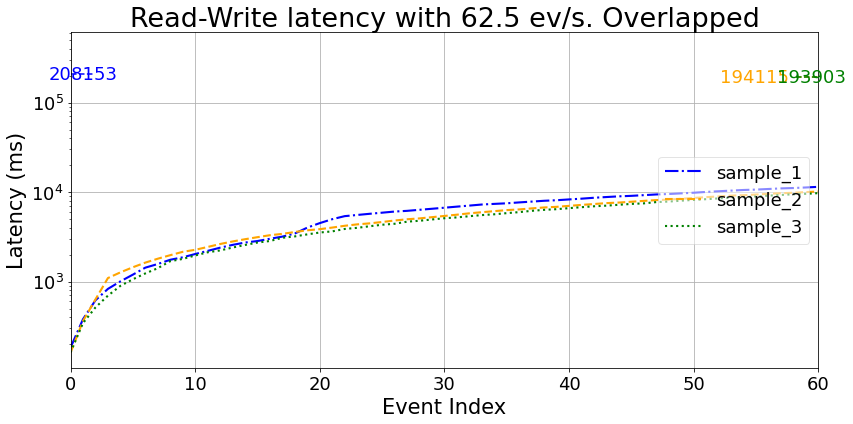

In [36]:
# fig, ax = plt.subplots(figsize=(12, 7), dpi=600)
fig, ax = plt.subplots(figsize=(12, 6))

# to add input-driver to the legend
# ax2.plot(np.nan, label = 'input-driver', color="blue", linestyle="dashdot")

# LINES
ax.plot(df1.index.to_list(), df1["processing_time_ms"].to_list(), color='blue', label="sample_1", linewidth=2.1, linestyle="dashdot")
ax.plot(df2.index.to_list(), df2["processing_time_ms"].to_list(), color='orange', label="sample_2", linewidth=2.1, linestyle="dashed")
ax.plot(df3.index.to_list(), df3["processing_time_ms"].to_list(), color='green', label="sample_3", linewidth=2.1, linestyle="dotted")

# MEANS
ax.axhline(df1["processing_time_ms"].mean(), xmin=0, xmax=0.03, color='blue', linestyle='--')
ax.axhline(df2["processing_time_ms"].mean(), xmin=0.97, xmax=1, color='orange', linestyle='--')
ax.axhline(df3["processing_time_ms"].mean(), xmin=0.97, xmax=1, color='green', linestyle='--')

ax.set(yscale='log')

# CONFIGURATION AX
ax.set_title("Read-Write latency with "+str(1/evrate)+" ev/s. Overlapped", size=27)
ax.set_xlabel("Event Index", size=21)
ax.set_ylabel("Latency (ms)",fontsize=21)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.legend(loc='right', framealpha=0.54, fontsize=18)
ax.grid()


ax.set_xlim([0, 60])

# TEXT CONFIGURATION
# transform make the position relative to the y axis [0-1]
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0.072,df1["processing_time_ms"].mean(), "{:.0f}".format(df1["processing_time_ms"].mean()), color="blue", transform=trans,
        ha="right", va="center", size=18)
ax.text(0.97002,df2["processing_time_ms"].mean(), "{:.0f}".format(df2["processing_time_ms"].mean()), color="orange", transform=trans,
        ha="right", va="center", size=18)
ax.text(0.954,df3["processing_time_ms"].mean(), "{:.0f}".format(df3["processing_time_ms"].mean()), color="green", transform=trans,
        ha="left", va="center", size=18)

plt.tight_layout()
# plt.savefig("nodriver_results/latency_nodriver_"+str(evrate)+"_1_2_3_firstsampleshigh.pdf", format='pdf')
plt.show()


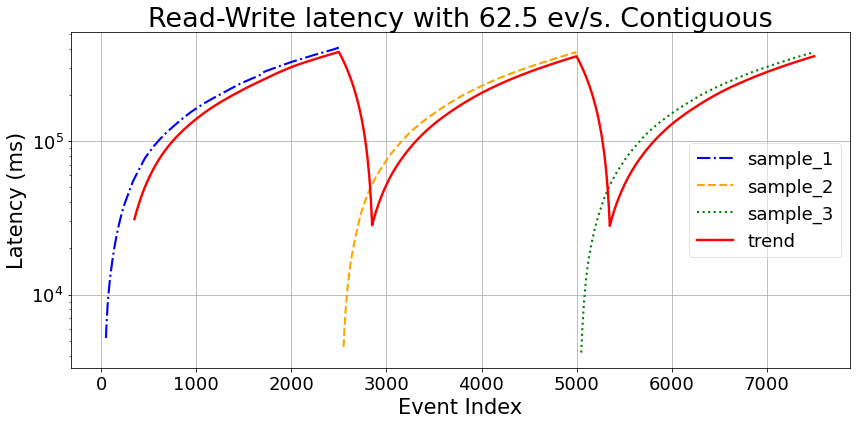

In [37]:
window_size = 50
df1["processing_time_ms_window"] = df1["processing_time_ms"].rolling(window_size).mean()
df2["processing_time_ms_window"] = df2["processing_time_ms"].rolling(window_size).mean()
df3["processing_time_ms_window"] = df3["processing_time_ms"].rolling(window_size).mean()

fig, ax = plt.subplots(figsize=(12, 6))

trend_window_size = 350
trend = pd.Series(df1["processing_time_ms"].to_list()+df2["processing_time_ms"].to_list()+df3["processing_time_ms"].to_list())
trend = trend.rolling(trend_window_size).mean()
# to add input-driver to the legend
# ax2.plot(np.nan, label = 'input-driver', color="blue", linestyle="dashdot")

# LINES
accum = 0
ax.plot(range(0,len(df1)), df1["processing_time_ms_window"].to_list(), color='blue', label="sample_1", linewidth=2.1, linestyle="dashdot")
accum += len(df1)
ax.plot(range(accum,accum+len(df2)), df2["processing_time_ms_window"].to_list(), color='orange', label="sample_2", linewidth=2.1, linestyle="dashed")
accum += len(df2)
ax.plot(range(accum,accum+len(df3)), df3["processing_time_ms_window"].to_list(), color='green', label="sample_3", linewidth=2.1, linestyle="dotted")
accum += len(df3)
ax.plot(range(0,accum), trend.to_list(), color='red', label="trend", linewidth=2.4)

ax.set(yscale='log')

# CONFIGURATION AX
ax.set_title("Read-Write latency with "+str(1/evrate)+" ev/s. Contiguous", size=27)
ax.set_xlabel("Event Index", size=21)
ax.set_ylabel("Latency (ms)",fontsize=21)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.legend(loc='right', framealpha=0.54, fontsize=18)
ax.grid()


plt.tight_layout()
# plt.savefig("nodriver_results/latency_nodriver_"+str(evrate)+"_1_2_3_consecutivetrend.pdf", format='pdf')
plt.show()


In [38]:
average = True
if average:
    # Use the mean of all 3 samples
    df0_016 = pd.read_csv(raw_path+"/processed_averaged/latency"+str(0.016)+".csv")
    df0_025 = pd.read_csv(raw_path+"/processed_averaged/latency"+str(0.025)+".csv")
    df0_05 = pd.read_csv(raw_path+"/processed_averaged/latency"+str(0.05)+".csv")
    df0_1 = pd.read_csv(raw_path+"/processed_averaged/latency"+str(0.1)+".csv")
    df0_2 = pd.read_csv(raw_path+"/processed_averaged/latency"+str(0.2)+".csv")
else:
    # Use the last sample (one with the lowest latency probably)
    df0_016 = pd.read_csv(raw_path+"/latency"+str(0.016)+"_3.csv")
    df0_025 = pd.read_csv(raw_path+"/latency"+str(0.025)+"_3.csv")
    df0_05 = pd.read_csv(raw_path+"/latency"+str(0.05)+"_3.csv")
    df0_1 = pd.read_csv(raw_path+"/latency"+str(0.1)+"_3.csv")
    df0_2 = pd.read_csv(raw_path+"/latency"+str(0.2)+"_3.csv")




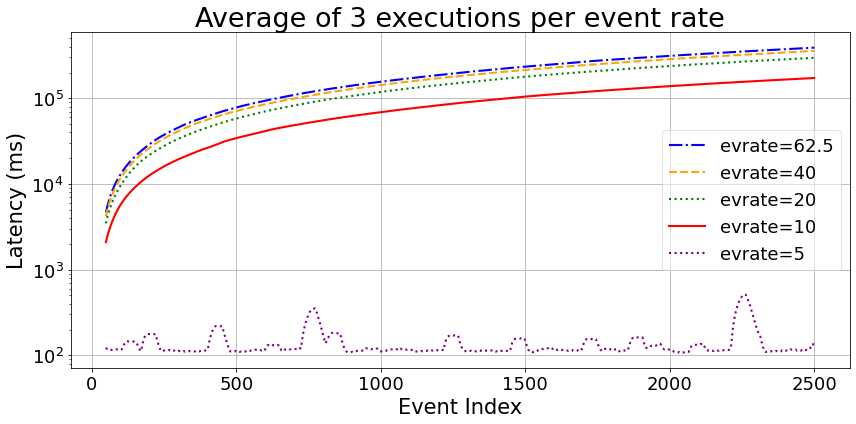

In [39]:
# Delete outliers, events with higher latency than 8 milliseconds

# Rolling window
window_size_all = 50
df0_016["processing_time_ms_window"] = df0_016["processing_time_ms"].rolling(window_size_all).mean()
df0_025["processing_time_ms_window"] = df0_025["processing_time_ms"].rolling(window_size_all).mean()
df0_05["processing_time_ms_window"] = df0_05["processing_time_ms"].rolling(window_size_all).mean()
df0_1["processing_time_ms_window"] = df0_1["processing_time_ms"].rolling(window_size_all).mean()
df0_2["processing_time_ms_window"] = df0_2["processing_time_ms"].rolling(window_size_all).mean()

# fig, ax = plt.subplots(figsize=(12, 7), dpi=600)
fig, ax = plt.subplots(figsize=(12, 6))

# to add input-driver to the legend
# ax2.plot(np.nan, label = 'input-driver', color="blue", linestyle="dashdot")

# LINES
ax.plot(df0_016.index.to_list(), df0_016["processing_time_ms_window"].to_list(), color='blue', label="evrate=62.5", linewidth=2.1, linestyle="dashdot")
ax.plot(df0_025.index.to_list(), df0_025["processing_time_ms_window"].to_list(), color='orange', label="evrate=40", linewidth=2.1, linestyle="dashed")
ax.plot(df0_05.index.to_list(), df0_05["processing_time_ms_window"].to_list(), color='green', label="evrate=20", linewidth=2.1, linestyle="dotted")
ax.plot(df0_1.index.to_list(), df0_1["processing_time_ms_window"].to_list(), color='red', label="evrate=10", linewidth=2.1, linestyle="solid")
ax.plot(df0_2.index.to_list(), df0_2["processing_time_ms_window"].to_list(), color='purple', label="evrate=5", linewidth=2.1, linestyle=":")

# MEANS
# ax.axhline(df0_016["processing_time_ms"].mean(), xmin=0, xmax=0.03, color='blue', linestyle='--')
# ax.axhline(df0_025["processing_time_ms"].mean(), xmin=0.97, xmax=1, color='orange', linestyle='--')
# ax.axhline(df0_05["processing_time_ms"].mean(), xmin=0.97, xmax=1, color='green', linestyle='--')
# ax.axhline(df0_1["processing_time_ms"].mean(), xmin=0.97, xmax=1, color='red', linestyle='--')
# ax.axhline(df0_2["processing_time_ms"].mean(), xmin=0.97, xmax=1, color='purple', linestyle='--')

ax.set(yscale='log')

# CONFIGURATION AX
if average:
    ax.set_title("Average of 3 executions per event rate", size=27)
else:
    ax.set_title("Sample 3 for every event rate", size=27)
ax.set_xlabel("Event Index", size=21)
ax.set_ylabel("Latency (ms)",fontsize=21)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.legend(loc='right', framealpha=0.54, fontsize=18)
ax.grid()


# ax.set_xlim([0, 60])

# TEXT CONFIGURATION
# transform make the position relative to the y axis [0-1]
# trans = transforms.blended_transform_factory(
#     ax.get_yticklabels()[0].get_transform(), ax.transData)
# ax.text(0.072,df1["processing_time_ms"].mean(), "{:.0f}".format(df1["processing_time_ms"].mean()), color="blue", transform=trans,
#         ha="right", va="center", size=18)
# ax.text(0.97002,df2["processing_time_ms"].mean(), "{:.0f}".format(df2["processing_time_ms"].mean()), color="orange", transform=trans,
#         ha="right", va="center", size=18)
# ax.text(0.954,df3["processing_time_ms"].mean(), "{:.0f}".format(df3["processing_time_ms"].mean()), color="green", transform=trans,
#         ha="left", va="center", size=18)

plt.tight_layout()
# if average:
#     plt.savefig("nodriver_results/all_latency_nodriver_averaged_.pdf", format='pdf')
# else:
#     plt.savefig("nodriver_results/all_latency_nodriver_execution3_.pdf", format='pdf')
plt.show()
